#Importing libraries

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting

#Loading the dataset

In [2]:
df = pd.read_csv('/content/house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Dataset glossary

1.Id 

2.price  - Price of the house

3.bedrooms - Number of Bedrooms

4.bathrooms - Number of Bathrooms

5.sqft_living - Square feet area of living area

6.sqft_lot  - Square feet area of parking Layout

7.floors - Number of Floors

8.waterfront - Whether waterfront is there or not

9.view - Number of Views

10.grade - Grades

11.sqft_above

12.sqft_basement - Square feet area off basement

13.yr_built - Year the house is built

14.yr_renovated - Year the house is renovated

15.zipcode - zipcode os the house

16.lat : Latitude of the house

17.lon : Longitude of the house

18.sqft_living15

19.sqft_lot15

#Accessing Information in the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [4]:
#Checking the number of rows and columns in our dataset
df.shape

(21613, 20)

In [5]:
#Checking for missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#data types
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#Checking for duplicates
df.duplicated().any()

True

we have duplicated values in our dataset and we are going to deal with them in the next step

#Data Cleaning

In [8]:
#Dropping duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#confirming if we still have duplicated values
df.duplicated().any()

False

In [ ]:
for i in df:
  print(i, df[i].value_counts())

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#Univariate Analysis

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
#creating a subset of columns we are going to use
df1 = df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]


In [13]:
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  plt.figure(figsize=(7,6))
  if kind == 'pie':
    plt.pie(x=df1[column].value_counts(), autopct='%1.1f%%', pctdistance=1.2)
    plt.legend(df1[column].value_counts().index, bbox_to_anchor=(1.05, 1.0), loc='upper left')
  elif kind == 'bar':
    plt.bar(x=df1[column].value_counts().index, height=df1[column].value_counts())
    plt.xticks(rotation='vertical')
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1.02)
  return plt.show()

In [14]:
# Creating a user defined function to change values from numerical to categorical for better visualizations
def categorize(df, column, replace, replace_with):
  df[column].replace(to_replace=replace, value=replace_with, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


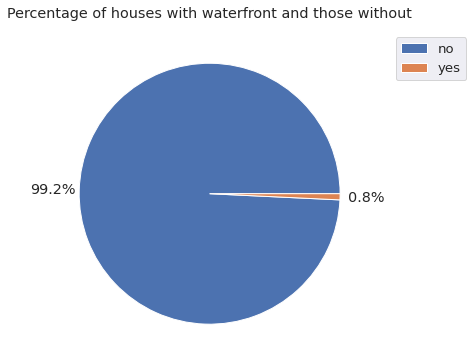

In [15]:
# Changing values from numerical to categorical
categorize(df1, 'waterfront', [0,1], ['no', 'yes'])
# Pie chart showing the percentage of houses with waterfront and those without
uni_visuals('waterfront', 'pie', 'Percentage of houses with waterfront and those without', '', '')

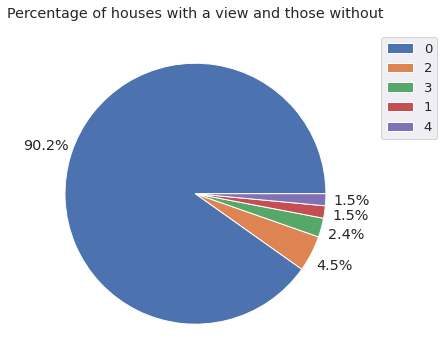

In [16]:
# Changing values from numerical to categorical
# Pie chart showing the percentage of houses with waterfront and those without
uni_visuals('view', 'pie', 'Percentage of houses with a view and those without', '', '')

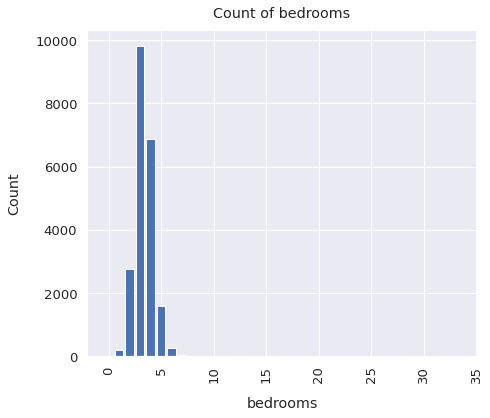

In [17]:
# Bar chart showing count of bedrooms
uni_visuals('bedrooms', 'bar', 'Count of bedrooms', 'bedrooms', 'Count')

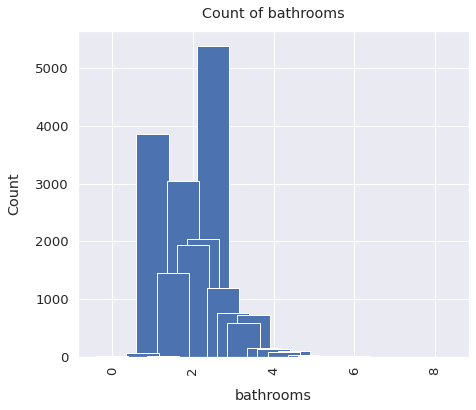

In [18]:
# Bar chart showing count of bathrooms
uni_visuals('bathrooms', 'bar', 'Count of bathrooms', 'bathrooms', 'Count')

*Most houses do not have a waterfront

*Most houses are three bedroom house

*Most houses have two bathrooms



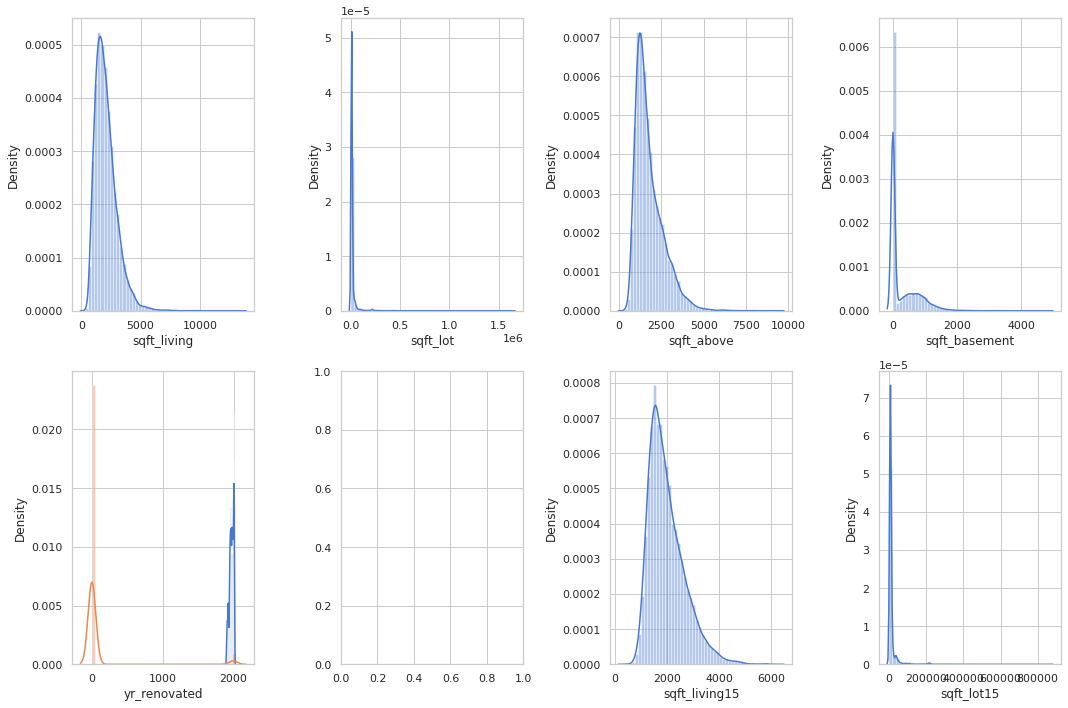

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style='whitegrid', palette='muted', color_codes=True)
fig, axes = plt.subplots(2,4, figsize=(15,10))
sns.distplot(df['sqft_living'], kde=True, ax=axes[0,0])
sns.distplot(df['sqft_lot'], kde=True, ax=axes[0,1])
sns.distplot(df['sqft_above'], kde=True, ax=axes[0,2])
sns.distplot(df['sqft_basement'], kde=True, ax=axes[0,3])
sns.distplot(df['yr_built'], kde=True, ax=axes[1,0])
sns.distplot(df['yr_renovated'], kde=True, ax=axes[1,0])
sns.distplot(df['sqft_living15'], kde=True, ax=axes[1,2])
sns.distplot(df['sqft_lot15'], kde=True, ax=axes[1,3])
plt.tight_layout()

It is observable that some of the variables follow a normal distribution and some follow a skewed distribution

In [20]:
df1.head()

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,1.00,3,1180,5650,1.0,no,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,2.25,3,2570,7242,2.0,no,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,1.00,2,770,10000,1.0,no,0,3,6,770,0,1933,0,2720,8062
3,604000.0,3.00,4,1960,5000,1.0,no,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,2.00,3,1680,8080,1.0,no,0,3,8,1680,0,1987,0,1800,7503


#Bivariate Analysis

correlation

In [24]:
df1.corr()

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.525140,0.308346,0.702046,0.089658,0.256793,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,0.585382,0.082457
bathrooms,0.525140,1.000000,0.515935,0.754688,0.087750,0.500669,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,0.568665,0.087191
bedrooms,0.308346,0.515935,1.000000,0.576674,0.031699,0.175448,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,0.391633,0.029233
sqft_living,0.702046,0.754688,0.576674,1.000000,0.172830,0.353954,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,0.756420,0.183285
sqft_lot,0.089658,0.087750,0.031699,0.172830,1.000000,-0.005171,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,0.144620,0.718556
floors,0.256793,0.500669,0.175448,0.353954,-0.005171,1.000000,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,0.279861,-0.011250
view,0.397466,0.187891,0.079433,0.284641,0.074753,0.029325,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.280404,0.072577
condition,0.036397,-0.124940,0.028422,-0.058768,-0.008967,-0.263779,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,-0.092854,-0.003424
grade,0.667478,0.664990,0.357003,0.762719,0.113644,0.458151,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,0.713208,0.119265
sqft_above,0.605569,0.685351,0.477619,0.876600,0.183527,0.523874,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,0.731870,0.194060


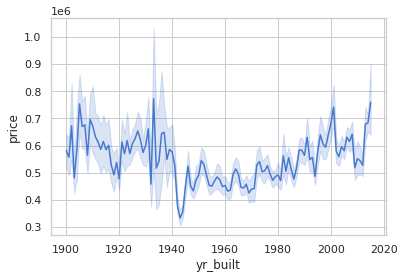

In [24]:
sns.lineplot(data=df1, x=df1['yr_built'], y=df1['price'])

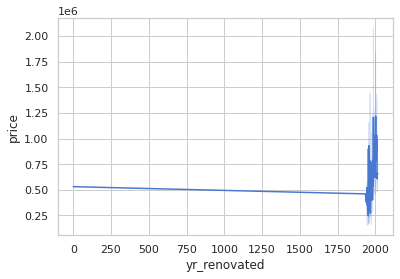

In [36]:
sns.lineplot(data=df1, x=df1['yr_renovated'], y=df1['price'])

Text(0.5, 1.0, 'Price of houses per number of bedrooms')

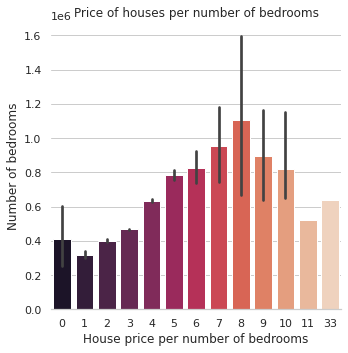

In [26]:
g = sns.catplot(x = 'bedrooms', y = 'price', data = df1, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('House price per number of bedrooms')
g.set_ylabels('Number of bedrooms')
plt.title('Price of houses per number of bedrooms')

Text(0.5, 1.0, 'Price of houses per number of bathrooms')

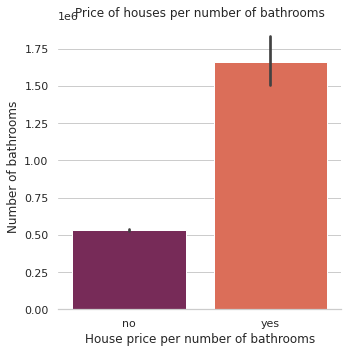

In [28]:
g = sns.catplot(x = 'waterfront', y = 'price', data = df1, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('House price per number of bathrooms')
g.set_ylabels('Number of bathrooms')
plt.title('Price of houses per number of bathrooms')

In [30]:
df1_sample = df.sample(n=20)

<Figure size 1152x720 with 0 Axes>

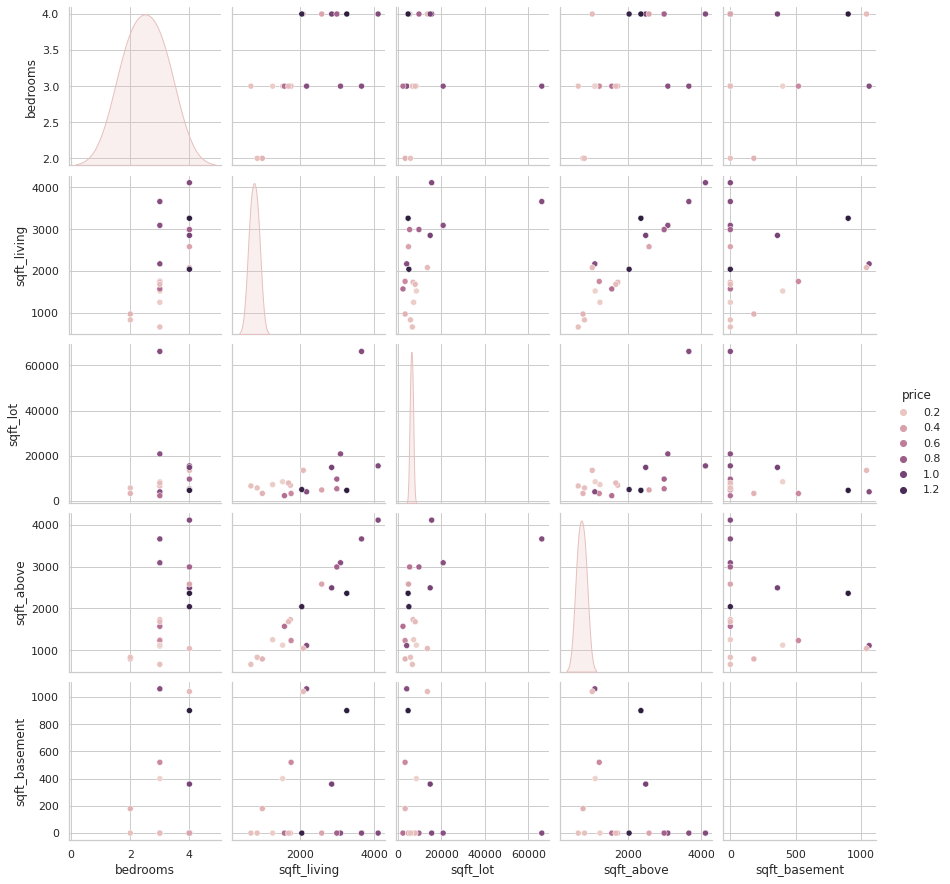

In [35]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid', palette='muted', color_codes=True)
sns.pairplot(hue='price', data=df1_sample[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above',	'sqft_basement']])

#Exploratory Data Analysis

In [37]:
#Creating a dataframe with variables to be used in building the model

In [38]:
Housing = df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
Housing.head()

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,1.00,3,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,2.25,3,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,1.00,2,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,3.00,4,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,2.00,3,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


#Checking for Multicollinearity

In [39]:
#Data pre-processing
X = Housing.iloc[:, 1:].values
y = Housing.iloc[:, 0].values

In [40]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [41]:
print(X)

[[1.000e+00 3.000e+00 1.180e+03 ... 0.000e+00 1.340e+03 5.650e+03]
 [2.250e+00 3.000e+00 2.570e+03 ... 1.991e+03 1.690e+03 7.639e+03]
 [1.000e+00 2.000e+00 7.700e+02 ... 0.000e+00 2.720e+03 8.062e+03]
 ...
 [7.500e-01 2.000e+00 1.020e+03 ... 0.000e+00 1.020e+03 2.007e+03]
 [2.500e+00 3.000e+00 1.600e+03 ... 0.000e+00 1.410e+03 1.287e+03]
 [7.500e-01 2.000e+00 1.020e+03 ... 0.000e+00 1.020e+03 1.357e+03]]


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(Housing)

pd.Series([variance_inflation_factor(x.values, i)
for i in range(x.shape[1])], index=x.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const            9690.282266
price               2.888707
bathrooms           3.374838
bedrooms            1.672798
sqft_living              inf
sqft_lot            2.088118
floors              1.936498
waterfront          1.256965
view                1.427986
condition           1.225147
grade               3.659145
sqft_above               inf
sqft_basement            inf
yr_built            2.247494
yr_renovated        1.144101
sqft_living15       2.824197
sqft_lot15          2.123299
dtype: float64

*no multicollinearity:(bedrooms,floors,waterfront,view,condition,year renovated)

*Moderate multicollinearity:(price,bathrooms,sqft lot,grade,year built,sqft living,sqft lot15)

*Perfect multicollinearity(sqft living,sqft above,sqft basement)
  

#Assessing heteroskedasticity

Bartlett's Test

In [43]:
from scipy.stats import bartlett

In [64]:
#subsetting the data
bedrooms = Housing['bedrooms']
bathrooms = Housing['bathrooms']
waterfront = Housing['waterfront']

In [66]:
stat, p = bartlett(bedrooms, bathrooms, waterfront)

In [67]:
print(stat, p)

73753.61506227334 0.0


Since we have p value of less than 0.05 we will reject the null hypothesis that states there is no difference  in variance between the groups

#Residual Plots

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('bedrooms ~ price + bathrooms', data=Housing).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3958.
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:33   Log-Likelihood:                -25724.
No. Observations:               21610   AIC:                         5.145e+04
Df Residuals:                   21607   BIC:                         5.148e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0519      0.016    129.710      0.0

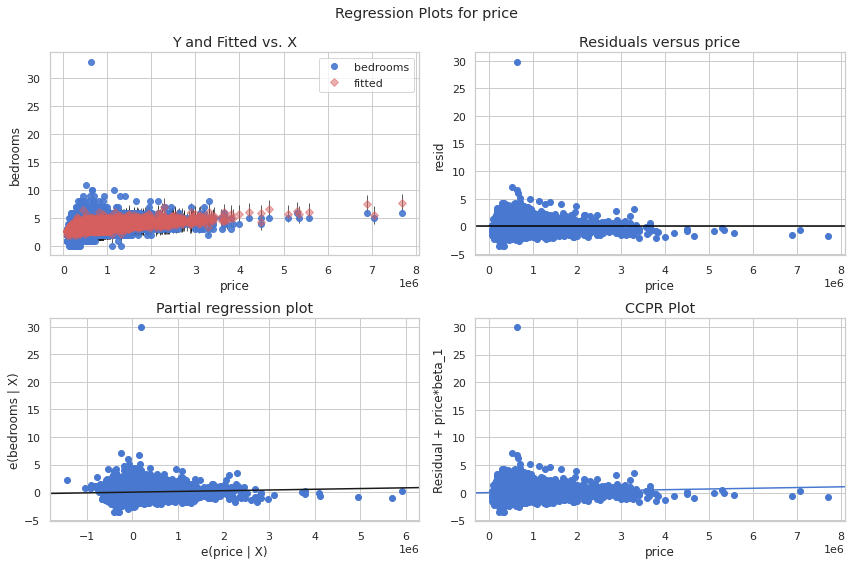

In [72]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'price', fig=fig)

#Multivariate Analysis

#Dimensionality Reduction(LDA)

In [31]:
X = Housing.iloc[:, 1:].values
y = Housing.iloc[:, 0].values

In [32]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [35]:
#Training the Multiple Linear Regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[630568.76 680200.  ]
 [470973.48 550000.  ]
 [249099.62 230000.  ]
 ...
 [553551.19 395000.  ]
 [424498.37 489000.  ]
 [307755.99 382500.  ]]


In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 139339.52142726767
Mean Squared Error: 44405356414.1834
Root Mean Squared Error: 210725.784882115


In [38]:
Housing.describe()

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,2.114739,3.370847,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,1986.518695,12769.031976
std,3.673876e+05,0.770204,0.930110,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.216125e+05,1.750000,3.000000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,2.250000,3.000000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2.500000,4.000000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,8.000000,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


#Quantile Regression

In [43]:

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
k = Housing_sample[['bedrooms','price']]

mod = smf.quantreg('bedrooms ~ price', k)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:               0.2146
Model:                       QuantReg   Bandwidth:                       1.180
Method:                 Least Squares   Sparsity:                        2.111
Date:                Fri, 15 Oct 2021   No. Observations:                   20
Time:                        18:33:52   Df Residuals:                       18
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3199      0.825      2.811      0.012       0.586       4.054
price       2.688e-06   1.74e-06      1.547      0.139   -9.63e-07    6.34e-06

The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


In [44]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['price']] + res.conf_int().loc['price'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'price_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


    qt     intercept    price_coef  cf_lower_bound  cf_upper_bound
0  0.1  1.131055e-11  5.825190e-06             NaN             NaN
1  0.2  2.999996e+00  9.654941e-12             NaN             NaN
2  0.3  1.899340e+00  3.346722e-06   -1.109242e-06        0.000008
3  0.4  2.427403e+00  2.044990e-06   -1.804613e-06        0.000006
4  0.5  2.319893e+00  2.688171e-06   -9.634036e-07        0.000006
5  0.6  2.510107e+00  2.449474e-06   -1.178697e-06        0.000006
6  0.7  2.229111e+00  3.134320e-06   -5.453906e-07        0.000007
7  0.8  3.999999e+00  1.748759e-12             NaN             NaN
8  0.9  2.222930e+00  2.632495e-06             NaN             NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


#Ridge Regression

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

46722423967.51933


In [47]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [48]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

47378090223.63537

In [49]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

46730236318.487785


In [50]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,Housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -39311.08734391684,
 'bedrooms': 109.32884229776027,
 'condition': 119822.6508515732,
 'floors': 578744.0611102405,
 'grade': 51.54704015246898,
 'price': 45694.56194155411,
 'sqft_above': 57.781802158574465,
 'sqft_basement': -3572.3495175475555,
 'sqft_living': -0.002059160495264223,
 'sqft_living15': -0.5502287100935064,
 'sqft_lot': 26958.49481968391,
 'view': 19573.604792331673,
 'waterfront': 43390.48875146217,
 'yr_built': 10.36253234331437,
 'yr_renovated': 24.887709957479274}

#Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [52]:
# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [53]:
# Importing linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6538243542447112
lasso MSE: 46722423999.74872
lasso coef: [ 3.52e+04 -3.66e+04  2.70e+05 -8.42e+01  1.46e+04  5.01e+04  3.32e+04
  1.27e+04  1.41e+05 -1.11e+05 -5.63e+04 -1.05e+05  4.16e+03  1.71e+04
 -1.50e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41650942900828.5, tolerance: 291664533601.623
  positive)


In [54]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6615917603317665
linear score: 0.6616146881618619
lasso MSE: 46020816592.021706
linear MSE: 46017698590.3303
lasso best estimator coef: [ 3.24e+04 -3.74e+04  2.21e+05 -1.42e+01  1.60e+04  4.50e+04  3.43e+04
  1.17e+04  1.41e+05 -6.37e+04 -2.89e+04 -1.04e+05  3.17e+03  1.45e+04
 -1.48e+04]
linear coef: [ 3.26e+04 -3.74e+04  7.80e+04 -4.09e+01  1.60e+04  4.50e+04  3.43e+04
  1.17e+04  1.41e+05  6.52e+04  4.00e+04 -1.04e+05  3.18e+03  1.46e+04
 -1.48e+04]


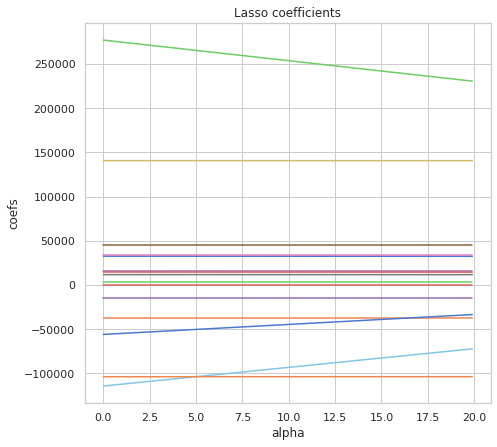

In [55]:
# Importing library for visualization
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

#Elastic Net Regression

In [57]:
# Importing our libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
# Creating linear regression model for the purpose of comparison
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 


46722423967.519325


In [63]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,Housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -36562.777657196966,
 'bedrooms': 76160.60988861576,
 'condition': 140848.29123433636,
 'floors': 50073.60494671638,
 'grade': 64556.49610620879,
 'price': 35193.306470660806,
 'sqft_above': 37261.48139147778,
 'sqft_basement': -104926.90336034725,
 'sqft_living': -85.29509825221612,
 'sqft_living15': -15024.182373410564,
 'sqft_lot': 14557.0751729319,
 'view': 12737.500574760576,
 'waterfront': 33242.26629160015,
 'yr_built': 4160.452846642101,
 'yr_renovated': 17058.28332725523}

In [64]:
# Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [65]:
#fitting our model 
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

47428118503.560104

In [66]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

82506604452.54384


In [69]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,Housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 8433.172226442668,
 'bedrooms': 26501.21957043956,
 'condition': 26370.23071727132,
 'floors': 12419.80666685789,
 'grade': 22141.62031780805,
 'price': 17774.860482561206,
 'sqft_above': 13567.739996417738,
 'sqft_basement': -3964.9004533649095,
 'sqft_living': 2162.5326855854414,
 'sqft_living15': 1440.4403064920439,
 'sqft_lot': 7867.883998780808,
 'view': 3733.836776467126,
 'waterfront': 16849.328338190782,
 'yr_built': 6015.289624033815,
 'yr_renovated': 21390.0893809112}